## Image Recognition using Keras

Image recognition refers to the task of inputting an image into a neural network and having it output some kind of label for that image. The label that the network outputs will correspond to a pre-defined class. There can be multiple classes that the image can be labeled as, or just one.

In [47]:
# importing packages for image reconition using keras
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
import numpy
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Softmax
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# fix random seed for reproducibility
seed = 21
numpy.random.seed(seed)


In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [5]:
print("Shape for train data set {} and shape for test data set is {}".format(X_train.shape,X_test.shape))

Shape for train data set (50000, 32, 32, 3) and shape for test data set is (10000, 32, 32, 3)


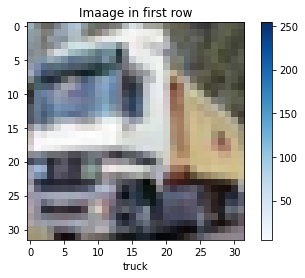

In [22]:
plt.figure()
# imshow is used to display the data as an image
# Each row represent a different Images
plt.imshow(X_train[1], cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(False)
plt.title("Imaage in first row")
#plt.xlabel(labels[y_train[1]])
plt.xlabel(labels[y_train[1].astype('int').tolist()[0]])
plt.show()

### Normalizing the DataSet

In [23]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [25]:
# Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [26]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [27]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [28]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [29]:
model.add(Flatten())
model.add(Dropout(0.2))

In [30]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [31]:
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [34]:
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [35]:
epochs = 10
optimizer = 'Adam'

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [37]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

In [38]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2499s 50ms/step - loss: 1.5068 - accuracy: 0.4648 - val_loss: 1.2162 - val_accuracy: 0.5555
Epoch 2/10
50000/50000 [==============================] - 2469s 49ms/step - loss: 1.0125 - accuracy: 0.6414 - val_loss: 0.9101 - val_accuracy: 0.6741
Epoch 3/10
50000/50000 [==============================] - 2454s 49ms/step - loss: 0.8547 - accuracy: 0.7004 - val_loss: 0.7340 - val_accuracy: 0.7454
Epoch 4/10
50000/50000 [==============================] - 2440s 49ms/step - loss: 0.7597 - accuracy: 0.7330 - val_loss: 0.7150 - val_accuracy: 0.7490
Epoch 5/10
50000/50000 [==============================] - 2466s 49ms/step - loss: 0.7069 - accuracy: 0.7545 - val_loss: 0.6774 - val_accuracy: 0.7645
Epoch 6/10
50000/50000 [==============================] - 2411s 48ms/step - loss: 0.6641 - accuracy: 0.7690 - val_loss: 0.6835 - val_accuracy: 0.7652
Epoch 7/10
50000/50000 [=========================

In [39]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)
print('\nTrain accuracy is:{} and Train loss is: {}'.format(train_acc,train_loss))


Train accuracy is:0.8676199913024902 and Train loss is: 0.3907642707777023


In [40]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy is:{} and Test loss is: {}'.format(test_acc,test_loss))


Test accuracy is:0.7847999930381775 and Test loss is: 0.6329252217769623


In [41]:
# Final evaluation of the model
scores_train = model.evaluate(X_train, y_train, verbose=0)
scores_test = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy is {} and Train Accuracy is {}".format((scores_test[1]*100),(scores_train[1]*100)))
#print("Accuracy: %.2f%%" % (scores_test[1]*100))

Test Accuracy is 78.47999930381775 and Train Accuracy is 86.76199913024902


In [49]:
#probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
probability_model = Sequential([model,Softmax()])
predictions = probability_model.predict(X_test)

In [117]:

def plot_image(i, predictions_array, true_label, img):
    true_label, img = max(true_label[i].astype('int').tolist()), img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.Blues)

    predicted_label = numpy.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                    100*numpy.max(predictions_array),
                                    labels[true_label]),
                                    color=color)


In [116]:
def plot_value_array(i, predictions_array, true_label):
    true_label = max(true_label[i].astype('int').tolist())
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = numpy.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('brown')

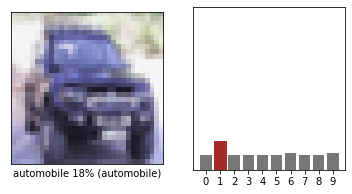

In [118]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

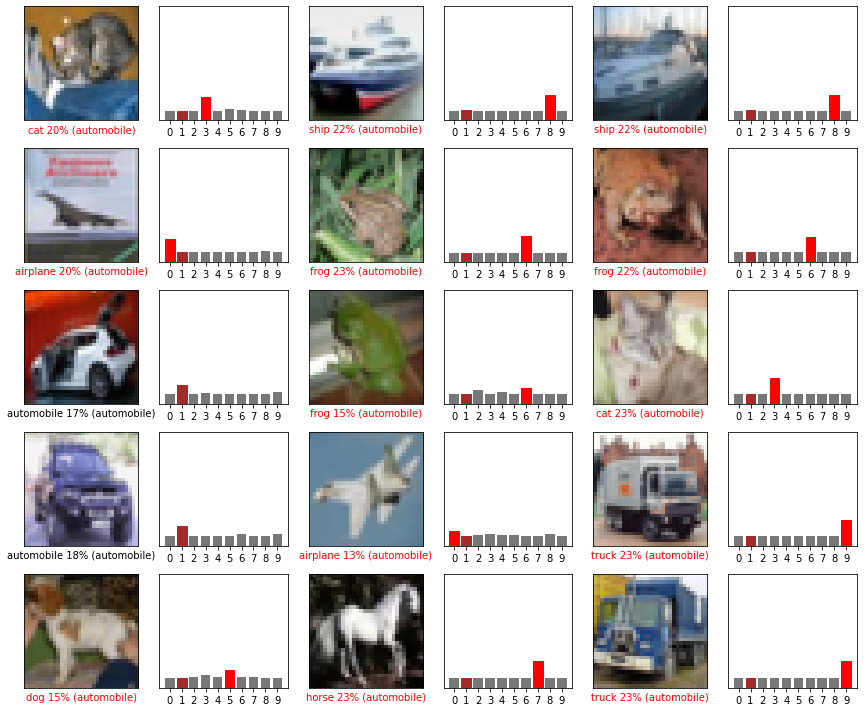

In [120]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()